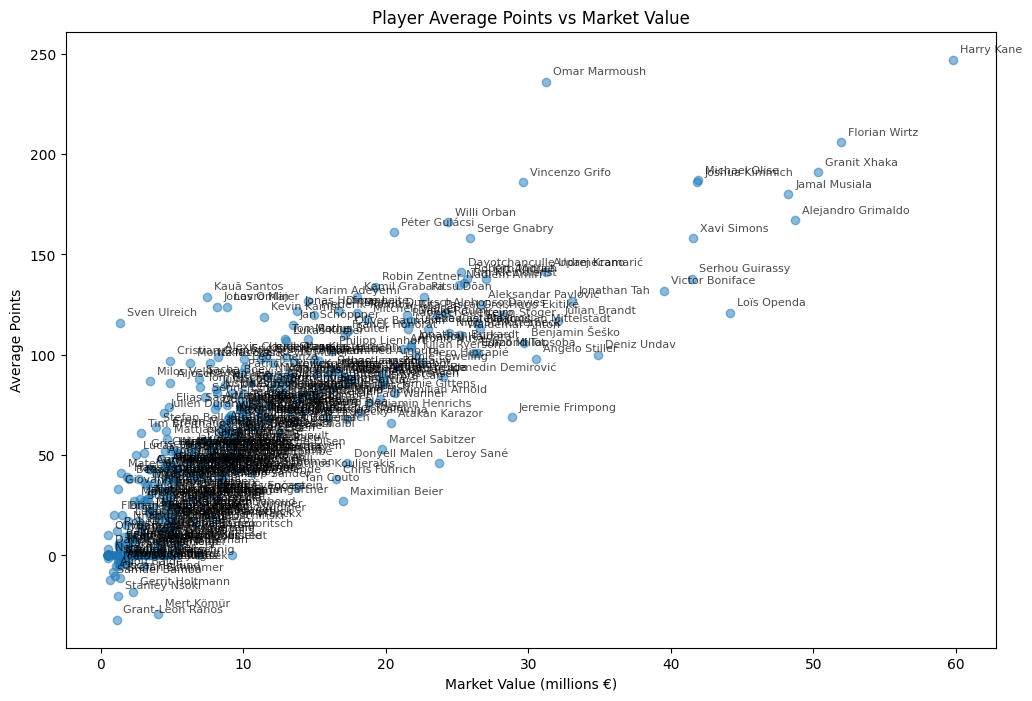

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
# Load the JSON data
with open('all_players.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract player data
players = data['players']

# Prepare lists for plotting
avg_points = []
market_values = []
names = []

for player_id, player_info in players.items():
    avg_points.append(player_info['averagePoints'])
    market_values.append(player_info['marketValue'] / 1000000)  # Convert to millions
    names.append(player_info['name'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(market_values, avg_points, alpha=0.5)

# Set labels and title
plt.xlabel('Market Value (millions €)')
plt.ylabel('Average Points')
plt.title('Player Average Points vs Market Value')

# Add annotations for some interesting points
for i, name in enumerate(names):
    if market_values[i] > 30 or avg_points[i]:
        plt.annotate(name, (market_values[i], avg_points[i]), xytext=(5, 5), 
                     textcoords='offset points', fontsize=8, alpha=0.7)




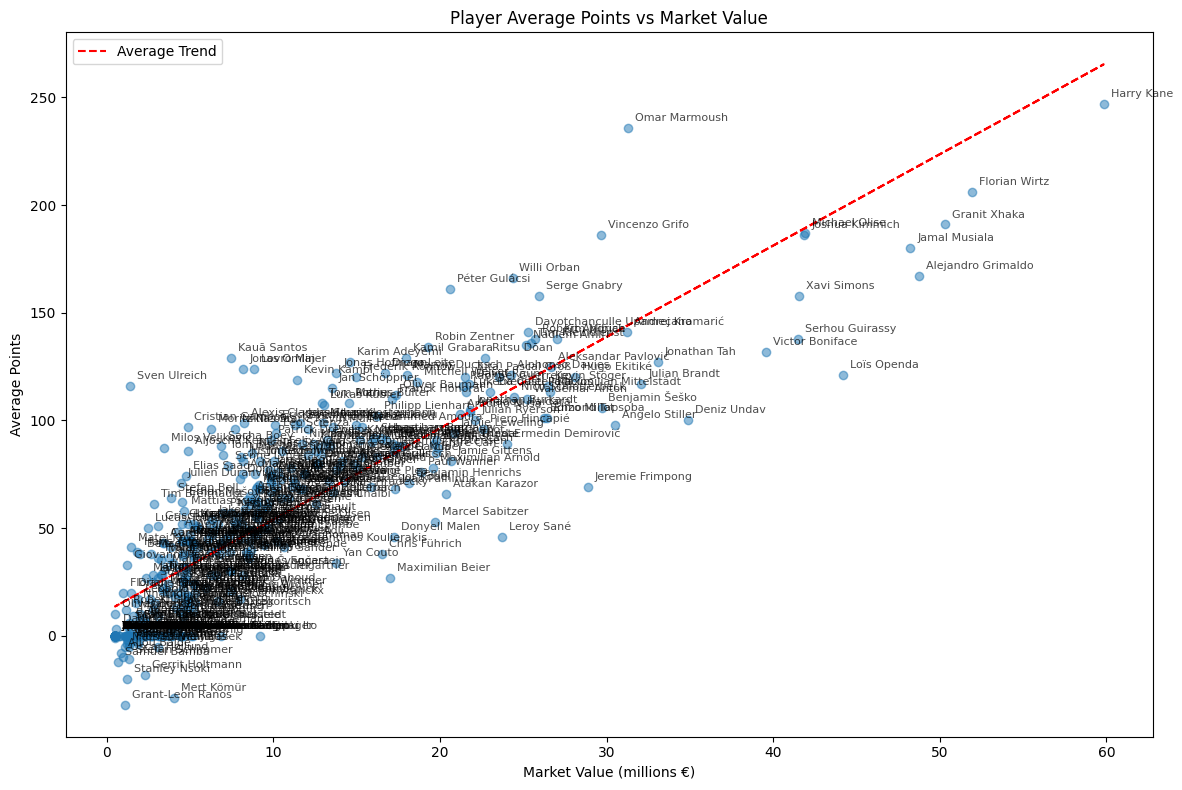

In [4]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(market_values, avg_points, alpha=0.5)

# Calculate and plot the linear trend line
z = np.polyfit(market_values, avg_points, 1)  # 1st degree polynomial (linear)
p = np.poly1d(z)
plt.plot(market_values, p(market_values), "r--", label="Average Trend")

# Set labels and title
plt.xlabel('Market Value (millions €)')
plt.ylabel('Average Points')
plt.title('Player Average Points vs Market Value')

# Add annotations for all points
for i, name in enumerate(names):
    plt.annotate(name, (market_values[i], avg_points[i]), xytext=(5, 5), 
                 textcoords='offset points', fontsize=8, alpha=0.7)

# Add legend
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

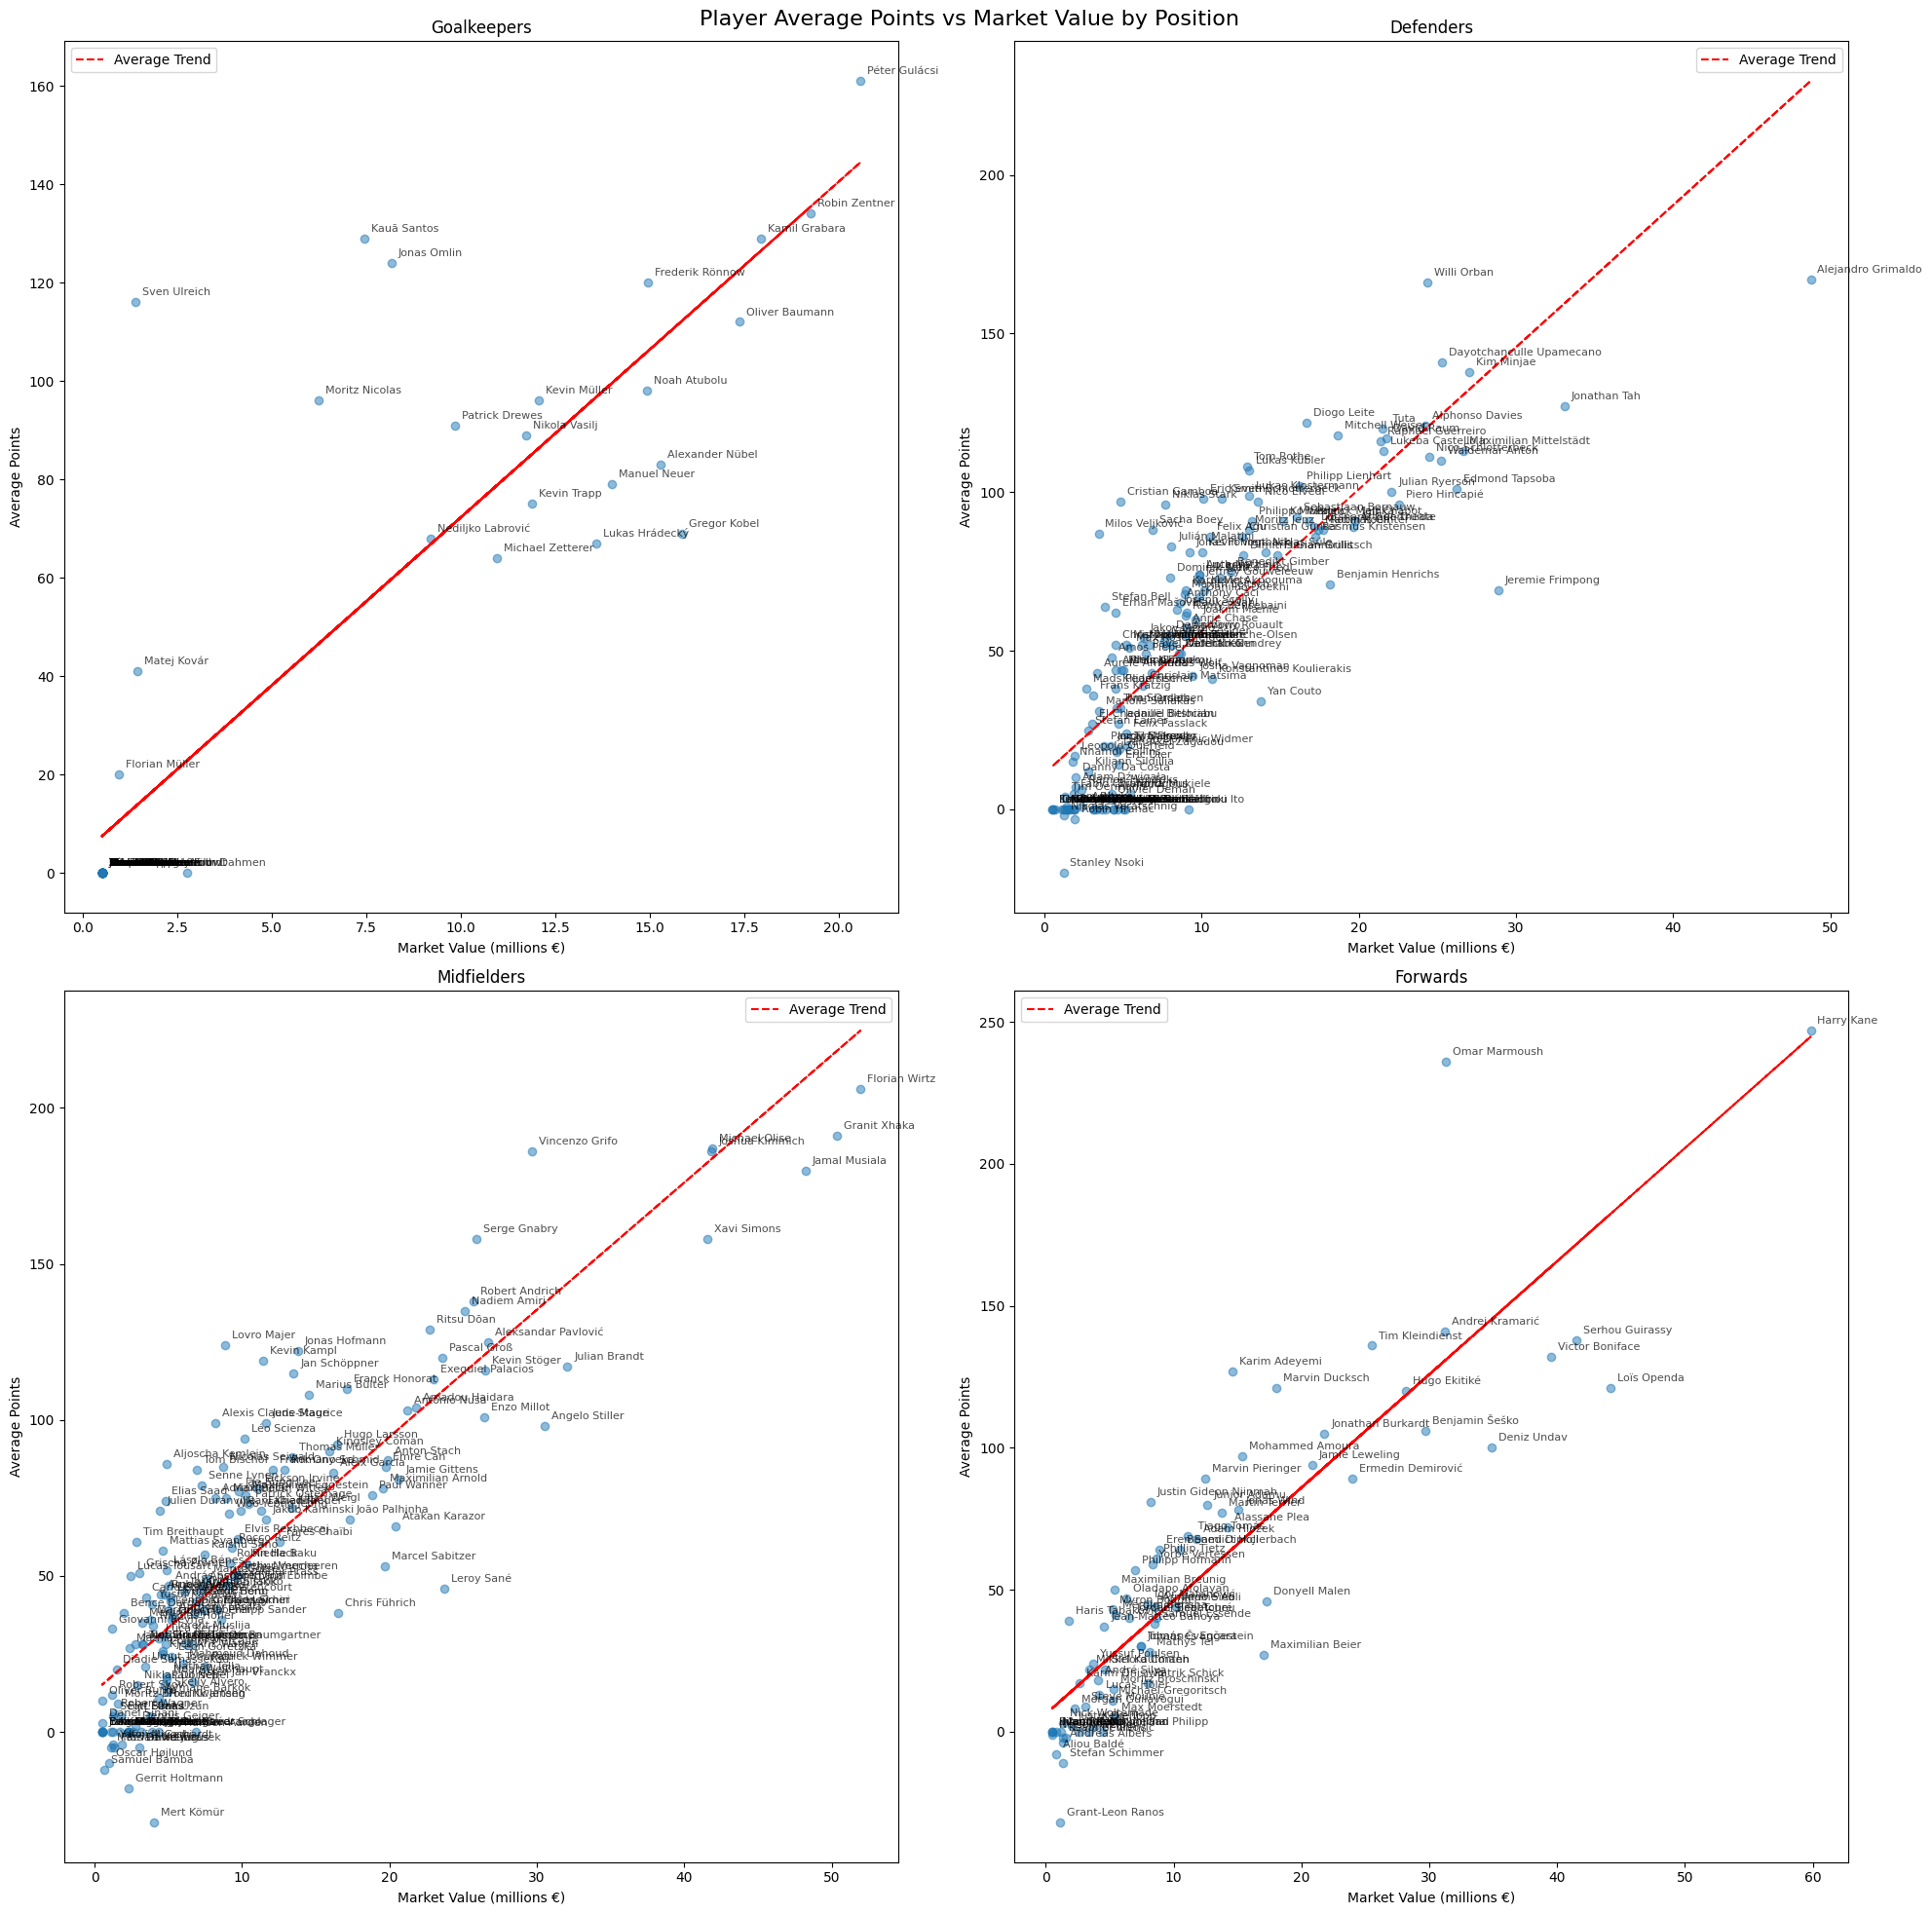

In [5]:
# Load the JSON data
with open('all_players.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract player data
players = data['players']
# Prepare lists for plotting
positions = {1: [], 2: [], 3: [], 4: []}

for player_id, player_info in players.items():
    position = player_info['position']
    if position in positions:
        positions[position].append({
            'avg_points': player_info['averagePoints'],
            'market_value': player_info['marketValue'] / 1000000,  # Convert to millions
            'name': player_info['name']
        })

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Player Average Points vs Market Value by Position', fontsize=16)

position_names = {1: 'Goalkeepers', 2: 'Defenders', 3: 'Midfielders', 4: 'Forwards'}

for i, (position, players) in enumerate(positions.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    avg_points = [p['avg_points'] for p in players]
    market_values = [p['market_value'] for p in players]
    names = [p['name'] for p in players]

    ax.scatter(market_values, avg_points, alpha=0.5)

    # Calculate and plot the linear trend line
    z = np.polyfit(market_values, avg_points, 1)
    p = np.poly1d(z)
    ax.plot(market_values, p(market_values), "r--", label="Average Trend")

    ax.set_xlabel('Market Value (millions €)')
    ax.set_ylabel('Average Points')
    ax.set_title(f'{position_names[position]}')

    # Add annotations for all points
    for j, name in enumerate(names):
        ax.annotate(name, (market_values[j], avg_points[j]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8, alpha=0.7)

    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

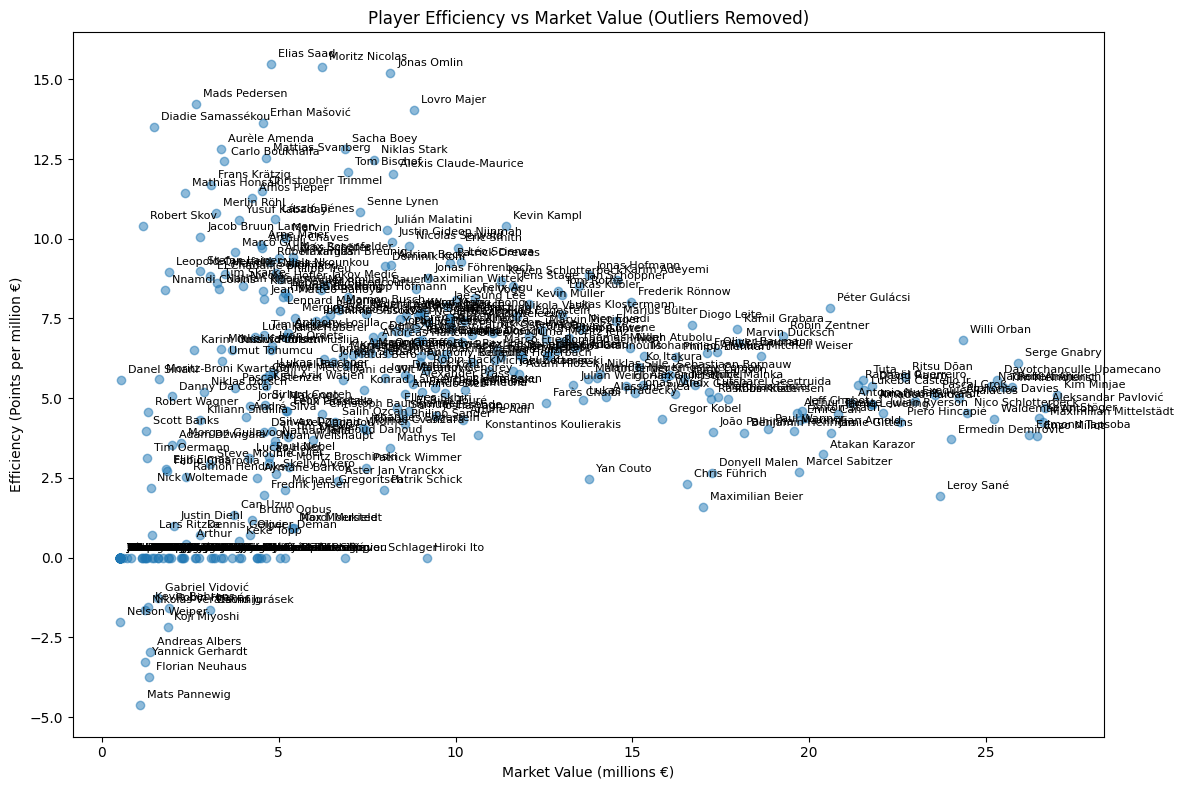

In [11]:
import numpy as np
from scipy import stats

# Calculate efficiency for each player
for player_id, player_info in players.items():
    player_info['efficiency'] = player_info['averagePoints'] / (player_info['marketValue'] / 1000000)  # Points per million €

# Prepare data for outlier removal
efficiencies = np.array([p['efficiency'] for p in players.values()])
market_values = np.array([p['marketValue'] / 1000000 for p in players.values()])

# Remove outliers using IQR method
def remove_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.logical_and(x >= lower_bound, x <= upper_bound)

efficiency_mask = remove_outliers(efficiencies)
market_value_mask = remove_outliers(market_values)
combined_mask = np.logical_and(efficiency_mask, market_value_mask)

# Filter data
filtered_players = [p for p, m in zip(players.values(), combined_mask) if m]
filtered_efficiencies = efficiencies[combined_mask]
filtered_market_values = market_values[combined_mask]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_market_values, filtered_efficiencies, alpha=0.5)
plt.xlabel('Market Value (millions €)')
plt.ylabel('Efficiency (Points per million €)')
plt.title('Player Efficiency vs Market Value (Outliers Removed)')

# Annotate some interesting points
for player in filtered_players:
    # if player['efficiency'] > np.percentile(filtered_efficiencies, 95) or player['marketValue'] / 1000000 > np.percentile(filtered_market_values, 95):
        plt.annotate(player['name'], 
                     (player['marketValue'] / 1000000, player['efficiency']), 
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()